In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from scipy.signal import hilbert
print(scipy.__version__)

1.6.2


370500
0.00010796250462214472
0.024999932523616736
-4631.2375
4631.212500067476


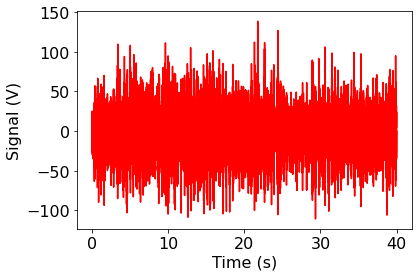

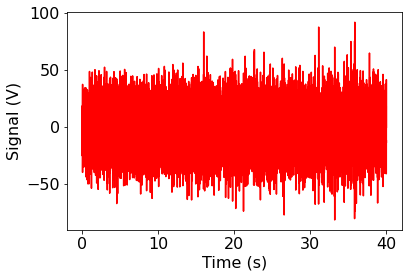

<Figure size 432x288 with 0 Axes>

In [26]:
#Plotting signal as function of time


signal1 = np.loadtxt('signal_brain.mat')
signal2 = np.loadtxt('signal_brain2.mat')

duration = 40
N1 = len(signal1)
time1 = np.linspace(0,duration,N1)
print(N1)

plt.plot(time1, signal1, color='red')
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Signal (V)", fontsize=16)
plt.figure()

plt.plot(time1, signal2, color='red')
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Signal (V)", fontsize=16)
plt.figure()

delta_t1 = time1[1]-time1[0]
print(delta_t1)

delta_f1 = 1/(N1*delta_t1)
print(delta_f1)

freq_values1 = np.linspace(0, (N1-1)*delta_f1, N1)
freq_values1 = freq_values1 - (N1/2)*delta_f1
print(freq_values1[0])
print(freq_values1[370499])

370500
370500


<Figure size 432x288 with 0 Axes>

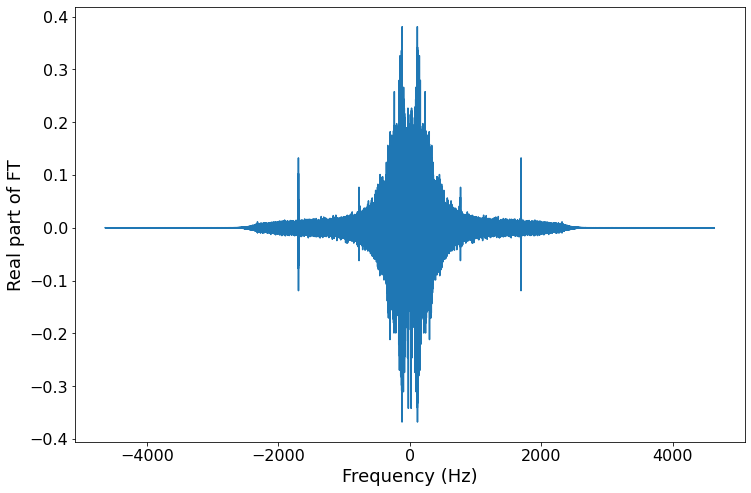

<Figure size 432x288 with 0 Axes>

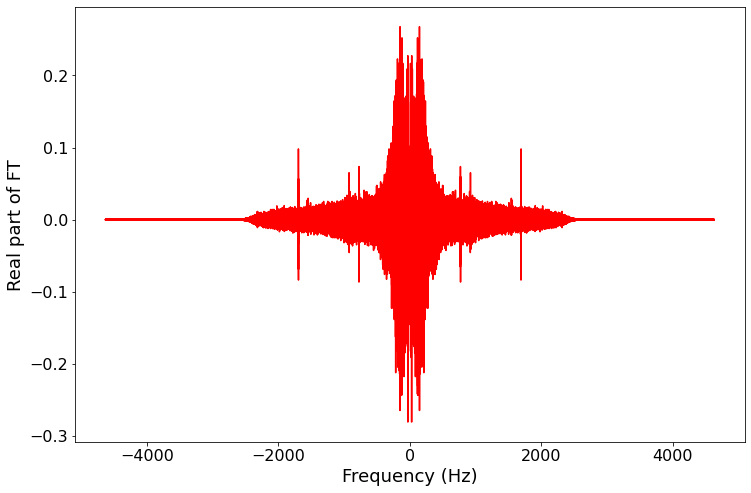

<Figure size 432x288 with 0 Axes>

In [27]:
#Fourier transforming the signal
Fourier_Transform1 = np.fft.fft(signal1)/N1 #normalising the FT
Fourier_Transform1 = np.fft.fftshift(Fourier_Transform1) #shifting the FT so it is symmetric bout 0
print(len(Fourier_Transform1))

Fourier_Transform2 = np.fft.fft(signal2)/N1
Fourier_Transform2 = np.fft.fftshift(Fourier_Transform2) 
print(len(Fourier_Transform2))


fig = plt.figure(figsize = (12,8))
ax = plt.axes()
ax.set_xlabel('Frequency (Hz)',fontsize = 18)
ax.set_ylabel('Real part of FT',fontsize = 18)
ax.plot(freq_values1, Fourier_Transform1.real, )
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16) 
plt.figure()

fig1 = plt.figure(figsize = (12,8))
ax1 = plt.axes()
ax1.set_xlabel('Frequency (Hz)',fontsize = 18)
ax1.set_ylabel('Real part of FT',fontsize = 18)
ax1.plot(freq_values1, Fourier_Transform2.real,color='red' )
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16) 
plt.figure()

[-9.09494702e-13  2.49999325e-02  4.99998650e-02 ...  4.63116250e+03
  4.63118750e+03  4.63121250e+03]


/Users/nathancrooks/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


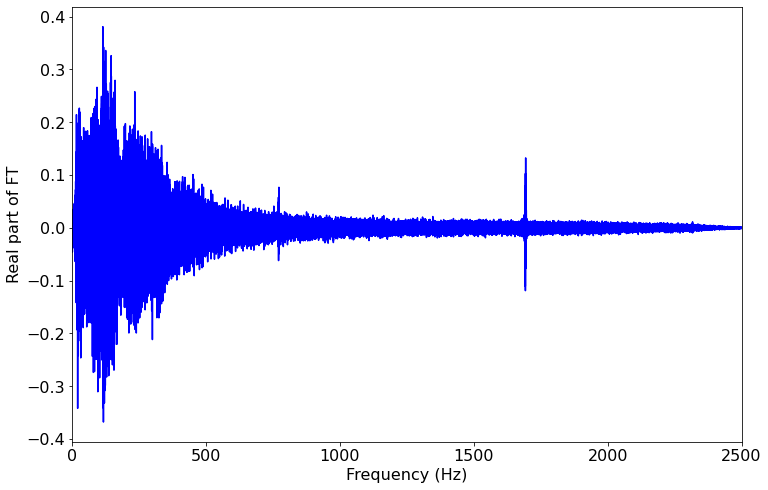

/Users/nathancrooks/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


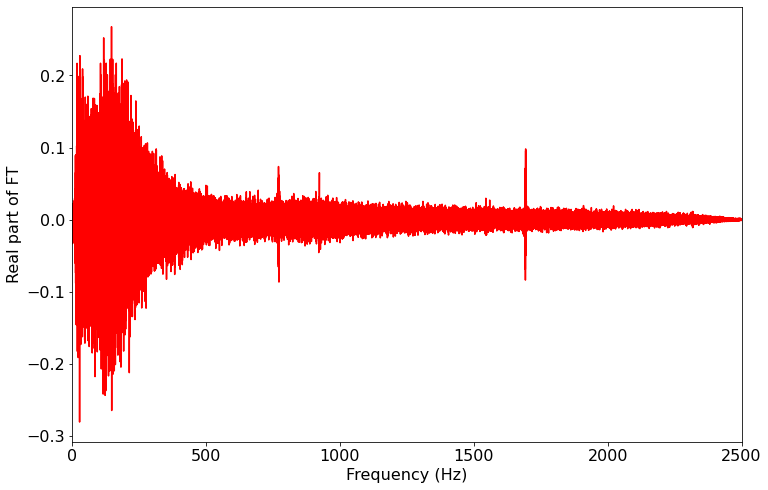

In [32]:
#Slicing the arrays so that we only view the positive frequencies as plot is symmetric 

FT_Pos1 = Fourier_Transform1[int(len(Fourier_Transform1)/2):]
FT_Pos2 = Fourier_Transform2[int(len(Fourier_Transform2)/2):]


freq_values_Pos1 = freq_values[int(len(freq_values1)/2):]
print(freq_values_Pos1)

fig = plt.figure(figsize = (12,8))
ax = plt.axes()
ax.set_xlabel('Frequency (Hz)',fontsize = 16)
ax.set_ylabel('Real part of FT',fontsize = 16)
ax.plot(freq_values_Pos1, FT_Pos1, color='blue')
ax.set_xlim([0,2500])
plt.show() 

fig = plt.figure(figsize = (12,8))
ax1 = plt.axes()
ax1.set_xlabel('Frequency (Hz)',fontsize = 16)
ax1.set_ylabel('Real part of FT',fontsize = 16)
ax1.plot(freq_values_Pos1, FT_Pos2, color='red')
ax1.set_xlim([0,2500])
plt.show()

In [ ]:
a1 = 0.08
c1 = 1
x1 = np.linspace(-600,600,len(Fourier_Transform)) 
FT_bandpass = np.zeros(len(Fourier_Transform))

In [57]:
# Looping the bandpass filters
max_freq = 4631
sample = 400
ratio = max_freq/sample
#sample = 600
# Define parameters of bandpass filter 
a1 = 0.08
c1 = 1
x1 = np.linspace(-max_freq,max_freq,len(Fourier_Transform1)) 
FT_bandpass1 = np.zeros(len(Fourier_Transform1))
FT_bandpass2 = np.zeros(len(Fourier_Transform1))
#array_stack1 = np.zeros((sample, len(Fourier_Transform1))) # array to store all 4300 different filtered signals
array_stack1 = []
array_stack2 = []

for i in range(sample):
    
    counter = i% 100 #tracks progress of code 
    if counter == 0:
        print(i)
        
    #formula for band pass filter (BPF), value BPF is centred on increases by 1Hz each time going from 0-600 Hz 
    band_pass1 = a1 *np.exp((-(x1-(i*ratio))**2)/(2*c1**2)) 
    for j in range(len(FT_bandpass1)):
        FT_bandpass1[j] = Fourier_Transform1[j] * band_pass1[j] #applies band pass to FT signal
        FT_bandpass2[j] = Fourier_Transform2[j] * band_pass1[j]
    signal_filtered1 = np.fft.irfft(FT_bandpass1) #performs inverse fourier transform to return to timme domain
    signal_filtered2 = np.fft.irfft(FT_bandpass2)
    #slicing arrays in half as real inverse fourier transform function apppears to produce an array double,
    #, the size than it should be. It appears that the array gets copied and mirrored as when plotted,
    #, they produce the symmetrical plot
    signal_filtered1 = signal_filtered1[:307500]   
    analytic_signal1 = hilbert(signal_filtered1) # performing hilbert transform then taking absolute value 
    amplitude_envelope1 = np.abs(analytic_signal1) 
    array_stack1.append(amplitude_envelope1)
    
    signal_filtered2 = signal_filtered2[:307500]   
    analytic_signal2 = hilbert(signal_filtered2) # performing hilbert transform then taking absolute value 
    amplitude_envelope2 = np.abs(analytic_signal2)
    #array_stack1[i,j] = amplitude_envelope1[j] #recording signal in array
    array_stack2.append(amplitude_envelope2)

0


<ipython-input-57-c4a2878ef63b>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  FT_bandpass1[j] = Fourier_Transform1[j] * band_pass1[j] #applies band pass to FT signal
<ipython-input-57-c4a2878ef63b>:26: ComplexWarning: Casting complex values to real discards the imaginary part
  FT_bandpass2[j] = Fourier_Transform2[j] * band_pass1[j]


100
200
300


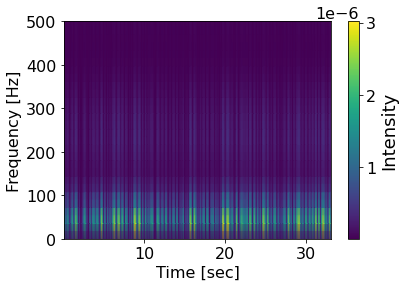

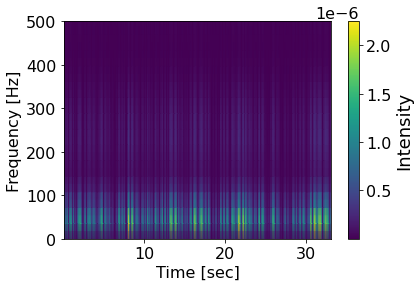

In [58]:
from scipy import signal
stack1 = np.zeros(len(amplitude_envelope1))
stack2 = np.zeros(len(amplitude_envelope2))
for i in range(sample):
    stack1 += array_stack1[i]
    stack2 += array_stack2[i]
    
fs = 9262.5
f, t, Sxx = signal.spectrogram(stack1, fs)
plt.pcolormesh(t, f, np.cbrt(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]',fontsize = 16)
plt.xlabel('Time [sec]',fontsize = 16)
plt.colorbar().set_label(label='Intensity',size=18)
plt.ylim([0,500])
plt.show()

f, t, Sxx = signal.spectrogram(stack2, fs)
plt.pcolormesh(t, f, np.cbrt(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]',fontsize = 16)
plt.xlabel('Time [sec]',fontsize = 16)
plt.colorbar().set_label(label='Intensity',size=18)
plt.ylim([0,500])
plt.show()

0
100
200
300


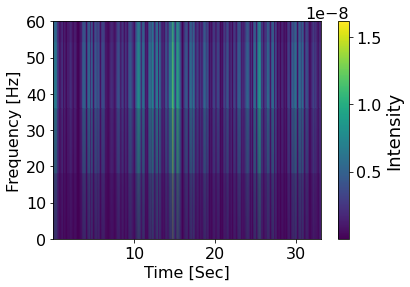

In [47]:
from scipy import signal
for i in range(sample):

    counter = i% 100 # tracks progress of code
    if counter == 0:
        print(i)
    #plots 
    envelope1 = array_stack1[i]
    f, t, Sxx = signal.spectrogram(envelope1, fs)
    plt.pcolormesh(t, f, np.cbrt(Sxx), shading='gouraud')
    plt.ylim([0,60])
    
plt.ylabel('Frequency [Hz]',fontsize = 16)
plt.xlabel('Time [Sec]',fontsize = 16)
plt.colorbar().set_label(label='Intensity',size=18)
